# Oberservation Analysis

###### ~The bar graph and summary statistics shows us that the treatments with Capomulin and Ramicane preformed the best when reducing the tumors.

#### The study had almost a completly equal amount of female mice to male mice with 125 males and 124 females. 

##### ~There was a strong positive correlation between tumor volume and weight at 0.84. Seeing that the larger the mouse the larger the tumor tended to be.


## Observations and Insights 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_comb_df = pd.merge(mouse_metadata, study_results , how='outer', on = 'Mouse ID')

# Display the data table for preview
data_comb_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice.
number_of_mice = data_comb_df["Mouse ID"].count()
number_of_mice

1893

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = data_comb_df[data_comb_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Optional: Get all the data for the duplicate mouse ID
all_duplicate_data = data_comb_df[data_comb_df.duplicated(["Mouse ID",])]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_comb_data = data_comb_df.drop_duplicates("Mouse ID")
clean_comb_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [97]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = clean_comb_data["Mouse ID"].count()
new_number_of_mice 

249

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = data_comb_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = data_comb_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()


variance = data_comb_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()


standard_deviation = data_comb_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()


SEM = data_comb_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.

Summary_Stats_df = pd.DataFrame({"Mean" : mean, 
                                   "Median" : median,
                                   "Variance" : variance,
                                   "Standard Deviation" : standard_deviation,
                                   "SEM" : SEM })
Summary_Stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

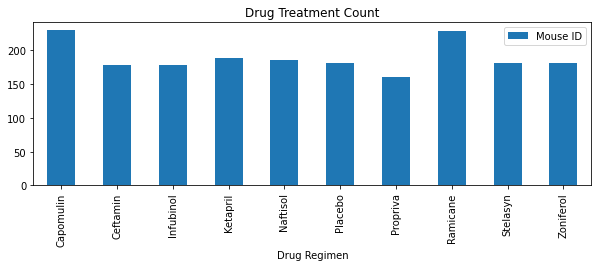

<Figure size 432x288 with 0 Axes>

In [99]:
#Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Drug_Regimen_data = pd.DataFrame(data_comb_df.groupby(["Drug Regimen"]).count()).reset_index()
Drug_Regimen_df = Drug_Regimen_data[["Drug Regimen", "Mouse ID"]]
Drug_Regimen_df = Drug_Regimen_df.set_index("Drug Regimen") 

#Creating the bar chart
Drug_Regimen_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()


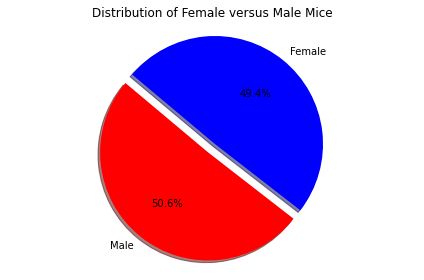

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


mice_gender_df = data_comb_df["Sex"].value_counts()
colors = ["red", "blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_gender_df.values, explode=explode, 
        labels=mice_gender_df.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of Female versus Male Mice")
plt.tight_layout()
plt.show()


# Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df = data_comb_df.loc[data_comb_df["Drug Regimen"] == "Capomulin"]

Ramicane_df = data_comb_df.loc[data_comb_df["Drug Regimen"] == "Ramicane"]

Infubinol_df = data_comb_df.loc[data_comb_df["Drug Regimen"] == "Infubinol"]

Ceftamin_df = data_comb_df.loc[data_comb_df["Drug Regimen"] == "Ceftamin"]



In [102]:
#Capomulin 
Capomulin_greatest = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol = pd.DataFrame(Capomulin_greatest)
Capomulin_merge =pd.merge(Capomulin_vol, data_comb_df,
                         on = ("Mouse ID","Timepoint"), how = "left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [103]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Capomulin_quartiles =Capomulin_tumors.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
print(f"The lower quartile of temperatures is: {Capomulin_lowerq}")
print(f"The upper quartile of temperatures is: {Capomulin_upperq}")
print(f"The interquartile range of temperatures is: {Capomulin_iqr}")

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq - (1.5*Capomulin_iqr)

print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 28.486425109999995 could be outliers.


In [104]:
#Ramicane
Ramicane_greatest = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_greatest)
Ramicane_merge =pd.merge(Ramicane_vol, data_comb_df,
                         on = ("Mouse ID","Timepoint"), how = "left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [105]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Ramicane_quartiles =Ramicane_tumors.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
print(f"The lower quartile of temperatures is: {Ramicane_lowerq}")
print(f"The upper quartile of temperatures is: {Ramicane_upperq}")
print(f"The interquartile range of temperatures is: {Ramicane_iqr}")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq - (1.5*Ramicane_iqr)

print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")


The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 27.01120119 could be outliers.


In [106]:
#Infubinol
Infubinol_greatest = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol = pd.DataFrame(Infubinol_greatest)
Infubinol_merge =pd.merge(Infubinol_vol, data_comb_df,
                         on = ("Mouse ID","Timepoint"), how = "left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [107]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Infubinol_quartiles = Infubinol_tumors.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Ramicane_lowerq
print(f"The lower quartile of temperatures is: {Infubinol_lowerq}")
print(f"The upper quartile of temperatures is: {Infubinol_upperq}")
print(f"The interquartile range of temperatures is: {Infubinol_iqr}")

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq - (1.5*Infubinol_iqr)

print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")


The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 33.9652733
Values below 3.100697740000001 could be outliers.
Values above 14.577832900000004 could be outliers.


In [108]:
#Ceftamin
Ceftamin_greatest = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_greatest)
Ceftamin_merge =pd.merge(Ceftamin_vol, data_comb_df,
                         on = ("Mouse ID","Timepoint"), how = "left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [109]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
Ceftamin_lowerq = Infubinol_quartiles[0.25]
Ceftamin_upperq = Infubinol_quartiles[0.75]
Ceftamin_iqr = Infubinol_upperq-Ramicane_lowerq
print(f"The lower quartile of temperatures is: {Ceftamin_lowerq}")
print(f"The upper quartile of temperatures is: {Ceftamin_upperq}")
print(f"The interquartile range of temperatures is: {Ceftamin_iqr}")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq - (1.5*Ceftamin_iqr)

print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")


The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 33.9652733
Values below 3.100697740000001 could be outliers.
Values above 14.577832900000004 could be outliers.


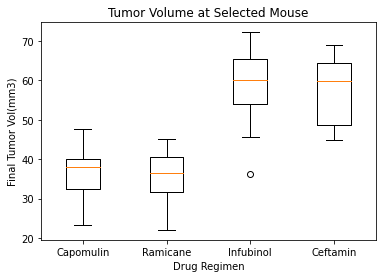

In [110]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume at Selected Mouse")
ax1.set_ylabel("Final Tumor Vol(mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(plot_data, labels=Drug_Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

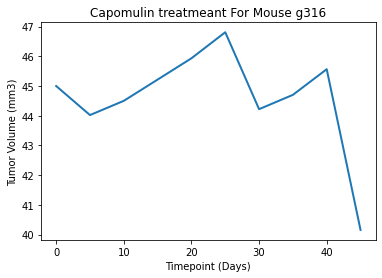

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_line = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
Capomulin_line.head()
x_axis = Capomulin_line["Timepoint"]
tumsiz = Capomulin_line ["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
plt.title("Capomulin treatmeant For Mouse g316")
plt.plot(x_axis, tumsiz, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

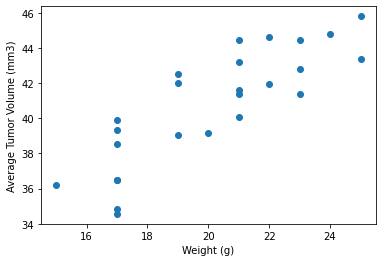

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


Capomulin_avg = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(Capomulin_avg["Weight (g)"], 
                                Capomulin_avg ["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
      
model = st.linregress(Capomulin_avg["Weight (g)"], Capomulin_avg ["Tumor Volume (mm3)"]) 
model                   

The correlation between mouse weight and average tumor volume is 0.84


LinregressResult(slope=0.9544396890241047, intercept=21.55216053268501, rvalue=0.841936342469472, pvalue=1.3225722434712478e-07, stderr=0.1275435903320133)

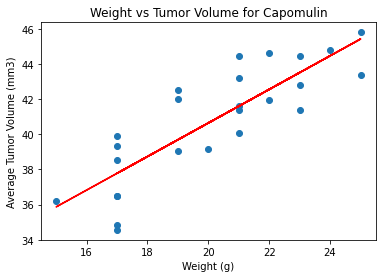

In [114]:
from scipy.stats import linregress


(slope, intercept,rvalue, pvalue, stderr)= linregress(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])
regress_values=Capomulin_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

Capomulin_avg = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])
plt.plot(Capomulin_avg["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()